In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

doh_dailyreport = pd.read_csv('DOH COVID Data Drop_ 20220219 - 05 DOH Data Collect - Daily Report.csv')
doh_baseline = pd.read_csv('DOH COVID Data Drop_ 20220219 - 10 DOH Data Collect - Baseline.csv')
metadata = pd.read_csv('DOH COVID Data Drop_ 20220219 - 03 Metadata - Fields.csv')

# Test-2 Data of Spread of Disease
sod_G2 = pd.read_csv('Test-2\Test 2 - Galvez\Test 2 Galvez - Spread of Disease.csv', skiprows = 16)
sodGdays2 = sod_G2.groupby(sod_G2.index // 480).sum()

In [60]:
# Convert reportdate 'string' from dailyreport to 'datetime' datatype
doh_dailyreport['reportdate'] = pd.to_datetime(doh_dailyreport['reportdate'])

# Filtering out to only the NCR Region
ncr = doh_dailyreport[doh_dailyreport['region'] == 'NATIONAL CAPITAL REGION (NCR)']

# Metadata
### What do the headers mean?

Refer to Index [47-69] for the cases 

In [59]:
metadata

,Sheet,Field,Description,Type,Question Format,Possible Responses,Purpose
0,DOH COVID Data Drop - 04 Case Information,CaseCode,Random code assigned for labelling cases; does...,Text,*,NaN,NaN
1,DOH COVID Data Drop - 04 Case Information,Age,Age,Number,Age,NaN,NaN
2,DOH COVID Data Drop - 04 Case Information,AgeGroup,Five-year age group,Text,*,NaN,NaN
3,DOH COVID Data Drop - 04 Case Information,Sex,Sex,Text,Sex,NaN,NaN
4,DOH COVID Data Drop - 04 Case Information,DateSpecimen,Date when specimen was collected,Date,NaN,NaN,NaN
5,DOH COVID Data Drop - 04 Case Information,DateResultRelease,Date of release of result,Date,NaN,NaN,NaN
6,DOH COVID Data Drop - 04 Case Information,DateRepConf,Date publicly announced as confirmed case,Date,NaN,NaN,NaN
7,DOH COVID Data Drop - 04 Case Information,DateDied,Date died,Date,NaN,NaN,NaN
8,DOH COVID Data Drop - 04 Case Information,DateRecover,Date recovered,Date,NaN,NaN,NaN
9,DOH COVID Data Drop - 04 Case Information,RemovalType,Type of removal (recovery or death),Text,NaN,NaN,NaN


# Select Pandas dataframe rows between two dates

[Guide](https://www.interviewqs.com/ddi-code-snippets/select-pandas-dataframe-rows-between-two-dates)

In [47]:
start_date = '2021-08-01'
end_date = '2022-02-18'

In [50]:
mask = (ncr['reportdate'] > start_date) & (ncr['reportdate'] <= end_date)

In [53]:
ncr_update = ncr.loc[mask]
ncr_update.head()

,hfhudcode,id,cfname,updateddate,addeddate,reportdate,icu_v,icu_o,isolbed_v,isolbed_o,beds_ward_v,beds_ward_o,mechvent_v,mechvent_o,icu_v_nc,icu_o_nc,nonicu_v_nc,nonicu_o_nc,mechvent_v_nc,mechvent_o_nc,qnurse,qdoctor,qother,nurse_adm,doctor_adm,other_adm,susp_asym,susp_mild,susp_severe,susp_crit,susp_died,susp_mod,prob_asym,prob_mild,prob_severe,prob_crit,prob_died,prob_mod,conf_asym,conf_mild,conf_severe,conf_crit,conf_died,conf_mod,tpatient_adm,tpatient_er,tpatient_icu,trans_ttmf,discharged,region,region_psgc,province_psgc,city_mun_psgc,province,city_mun,north_coord,east_coord
15002,DOH000000000004475,404562.0,"SAN LORENZO HOSPITAL HEALTH MANAGEMENT CO., INC.",2021-08-02 09:04:37,2021-08-02 09:04:37,2021-08-02,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH137400000,PH137404000,"NCR, SECOND DISTRICT (NOT A PROVINCE)",QUEZON CITY,0.0,0.0
15003,DOH000000000004475,406625.0,"SAN LORENZO HOSPITAL HEALTH MANAGEMENT CO., INC.",2021-08-03 10:24:51,2021-08-03 10:24:51,2021-08-03,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH137400000,PH137404000,"NCR, SECOND DISTRICT (NOT A PROVINCE)",QUEZON CITY,0.0,0.0
15004,DOH000000000004475,407983.0,"SAN LORENZO HOSPITAL HEALTH MANAGEMENT CO., INC.",2021-08-04 09:11:38,2021-08-04 09:11:38,2021-08-04,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH137400000,PH137404000,"NCR, SECOND DISTRICT (NOT A PROVINCE)",QUEZON CITY,0.0,0.0
15005,DOH000000000004475,410084.0,"SAN LORENZO HOSPITAL HEALTH MANAGEMENT CO., INC.",2021-08-05 10:45:31,2021-08-05 10:45:31,2021-08-05,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH137400000,PH137404000,"NCR, SECOND DISTRICT (NOT A PROVINCE)",QUEZON CITY,0.0,0.0
15006,DOH000000000004475,411545.0,"SAN LORENZO HOSPITAL HEALTH MANAGEMENT CO., INC.",2021-08-06 09:36:01,2021-08-06 09:36:01,2021-08-06,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH137400000,PH137404000,"NCR, SECOND DISTRICT (NOT A PROVINCE)",QUEZON CITY,0.0,0.0


# Group NCR cases in dates

In [55]:
#ncr_date = ncr.groupby([ncr['reportdate'].dt.date]).sum()
ncr_date = ncr_update.groupby([ncr['reportdate'].dt.date]).sum()
ncr_date.head()

,id,icu_v,icu_o,isolbed_v,isolbed_o,beds_ward_v,beds_ward_o,mechvent_v,mechvent_o,icu_v_nc,icu_o_nc,nonicu_v_nc,nonicu_o_nc,mechvent_v_nc,mechvent_o_nc,qnurse,qdoctor,qother,nurse_adm,doctor_adm,other_adm,susp_asym,susp_mild,susp_severe,susp_crit,susp_died,susp_mod,prob_asym,prob_mild,prob_severe,prob_crit,prob_died,prob_mod,conf_asym,conf_mild,conf_severe,conf_crit,conf_died,conf_mod,tpatient_adm,tpatient_er,tpatient_icu,trans_ttmf,discharged,north_coord,east_coord
reportdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-02,63997878.0,495.0,660.0,2206.0,2310.0,1966.0,1683.0,571.0,402.0,766.0,846.0,5286.0,10175.0,689.0,562.0,371.0,139.0,273.0,36.0,11.0,36.0,448.0,441.0,250.0,65.0,29.0,609.0,66.0,117.0,114.0,49.0,21.0,311.0,229.0,696.0,634.0,340.0,4.0,967.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-03,64271856.0,474.0,677.0,2184.0,2390.0,1886.0,1712.0,578.0,422.0,723.0,825.0,4880.0,10730.0,635.0,572.0,371.0,139.0,273.0,36.0,11.0,36.0,416.0,445.0,279.0,61.0,29.0,544.0,66.0,153.0,115.0,57.0,21.0,277.0,225.0,712.0,665.0,364.0,4.0,1030.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-04,64536176.0,479.0,661.0,2198.0,2418.0,1803.0,1816.0,587.0,415.0,692.0,836.0,4948.0,10679.0,618.0,535.0,371.0,139.0,273.0,36.0,11.0,36.0,404.0,460.0,282.0,62.0,29.0,550.0,98.0,135.0,116.0,44.0,21.0,287.0,289.0,722.0,742.0,363.0,4.0,1124.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-05,64807802.0,456.0,701.0,2115.0,2418.0,1710.0,1934.0,554.0,455.0,722.0,869.0,5118.0,10527.0,656.0,509.0,371.0,139.0,273.0,36.0,11.0,36.0,373.0,428.0,263.0,73.0,29.0,660.0,86.0,106.0,109.0,53.0,21.0,275.0,309.0,777.0,735.0,376.0,4.0,1213.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-06,65081180.0,471.0,679.0,2129.0,2489.0,1734.0,1949.0,545.0,456.0,668.0,846.0,5143.0,10407.0,642.0,511.0,371.0,139.0,273.0,36.0,11.0,36.0,386.0,495.0,251.0,85.0,29.0,505.0,75.0,120.0,110.0,45.0,21.0,271.0,328.0,842.0,795.0,379.0,4.0,1282.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0


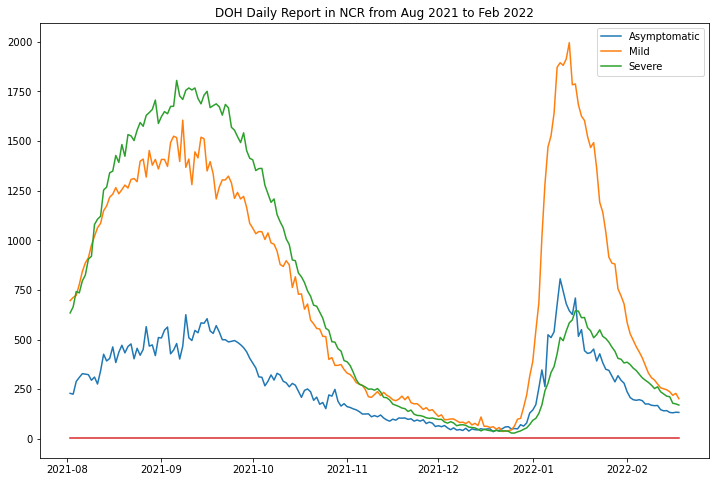

In [77]:
plt.figure(figsize=(12,8))
plt.plot(ncr_date.conf_asym)
plt.plot(ncr_date.conf_mild)
plt.plot(ncr_date.conf_severe)
plt.plot(ncr_date.conf_died)
#plt.plot(sodGdays2.y)
plt.legend(['Asymptomatic', 'Mild', 'Severe'])
plt.title('DOH Daily Report in NCR from Aug 2021 to Feb 2022')
plt.show()